# Solving Bohachevsky function using scipy dual annealing

In [1]:
#!pip install scipy
import numpy as np
from scipy.optimize import dual_annealing

# Define objective function/s
def objective_function(solution):
    # Bohachevsky function
    return solution[0]**2 +2*(solution[1]**2) - 0.3*np.cos(3*np.pi*solution[0]) - 0.4*np.cos(4*np.pi*solution[1]) + 0.7

# Define boundary constraints of the decision variables
bounds = np.asarray([[-100, 100], [-100, 100]])

# Perform dual annealing search
res_dual = dual_annealing(objective_function, bounds=bounds, maxiter = 100)

# Print Dual Annealing Solution
print('Dual Annealing Solution: f(%s) = %.5f' % (res_dual['x'], res_dual['fun']))

Dual Annealing Solution: f([-6.63149393e-08 -4.69527479e-01]) = 0.46988


# Solving Bohachevsky function using MEALPY SA

In [2]:
#!pip install mealpy
from numpy import exp, arange
import matplotlib.pyplot as plt
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
from mealpy.physics_based.SA import OriginalSA

# Define the problem
problem = {
    "fit_func": objective_function,
    "lb": [bounds[0][0], bounds[1][0]],
    "ub": [bounds[0][1], bounds[1][1]],
    "minmax": "min",
    "obj_weights": [1, 1]
}

# Define algorithm parameters
epoch = 100 #D
pop_size = 10
max_sub_iter = 2
t0 = 1000
t1 = 1
move_count = 5
mutation_rate = 0.1
mutation_step_size = 0.1
mutation_step_size_damp = 0.99

# Define a SA solver
model = OriginalSA(epoch, pop_size, max_sub_iter, t0, t1, move_count, mutation_rate, mutation_step_size, mutation_step_size_damp)

# Solve the problem using defined solver
mealpy_solution, mealpy_value = model.solve(problem)

# Print MEALPY SA Solution
print('MEALPY SA Solution: f(%s) = %.5f' % (mealpy_solution, mealpy_value))

2023/11/08 06:21:28 PM, INFO, mealpy.physics_based.SA.OriginalSA: Solving single objective optimization problem.
2023/11/08 06:21:28 PM, INFO, mealpy.physics_based.SA.OriginalSA: >Problem: P, Epoch: 1, Current best: 725.532510989222, Global best: 725.532510989222, Runtime: 0.02343 seconds
2023/11/08 06:21:28 PM, INFO, mealpy.physics_based.SA.OriginalSA: >Problem: P, Epoch: 2, Current best: 133.06331405046515, Global best: 133.06331405046515, Runtime: 0.01973 seconds
2023/11/08 06:21:28 PM, INFO, mealpy.physics_based.SA.OriginalSA: >Problem: P, Epoch: 3, Current best: 4.291037333849206, Global best: 4.291037333849206, Runtime: 0.02741 seconds
2023/11/08 06:21:28 PM, INFO, mealpy.physics_based.SA.OriginalSA: >Problem: P, Epoch: 4, Current best: 2.8357385466367564, Global best: 2.8357385466367564, Runtime: 0.02405 seconds
2023/11/08 06:21:28 PM, INFO, mealpy.physics_based.SA.OriginalSA: >Problem: P, Epoch: 5, Current best: 4.2718995276994285, Global best: 2.8357385466367564, Runtime: 0.02

MEALPY SA Solution: f([0.0330964  0.01039249]) = 0.01919


# Plotting the objective functions and the obtained solutions

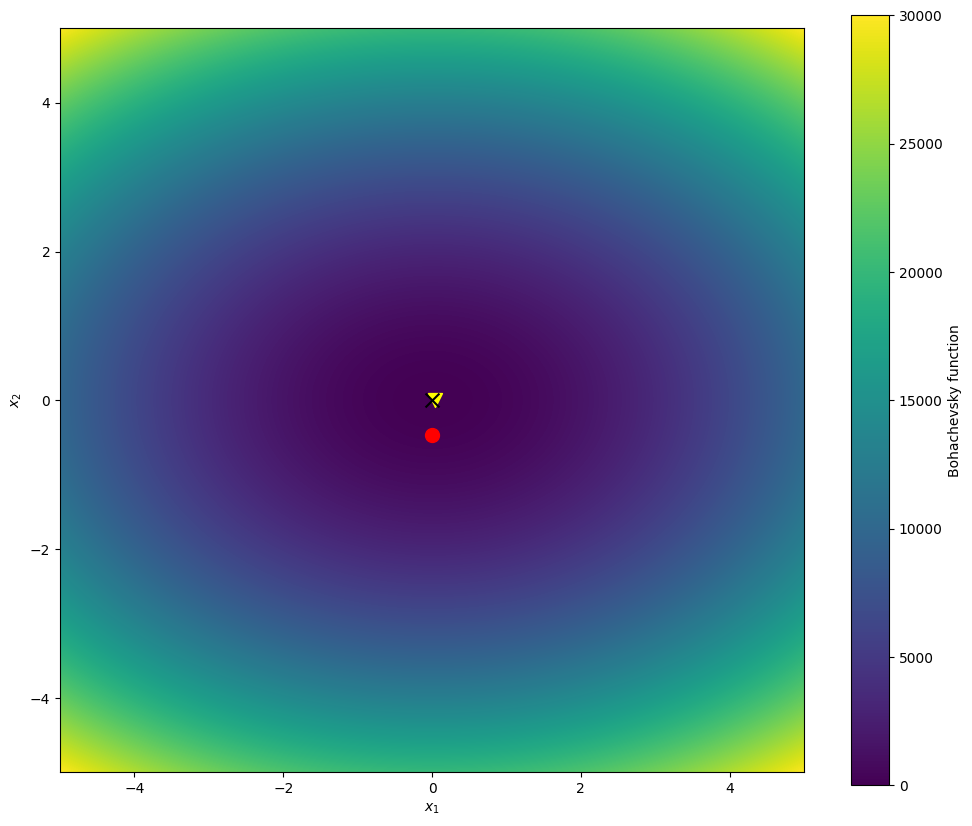

In [3]:
x = arange(bounds[0][0],bounds[0][1],0.1)
y = arange(bounds[0][0],bounds[0][1],0.1)
X,Y = meshgrid(x, y)
F = objective_function([X,Y])

plt.figure(figsize=(12, 10))
plt.imshow(F, extent=[-5, 5,-5, 5], origin='lower', cmap='viridis')
plt.colorbar(label="Bohachevsky function")
plt.scatter(res_dual['x'][0],res_dual['x'][1], c='red',  s=100, marker='o')
plt.scatter(mealpy_solution[0],mealpy_solution[1], c='yellow',  s=100, marker='v')
plt.scatter(0,0, c='black', s=100, marker='x')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()
# plt.savefig('CH05_F12.png', format='png', dpi=300)